# Wine_cleaning

In [1]:
# Import dependencies 
import pandas as pd
import unidecode

In [2]:
# Import data
wine_data_df = pd.read_csv("Data/winemag-data-130k-v2.csv")  
print(wine_data_df.shape)
wine_data_df.head()

(129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Select and keep only US data

In [3]:
# Only keep rows where country = US
US_wine_data_df = wine_data_df.loc[wine_data_df["country"] == "US"]
print(US_wine_data_df.shape)
US_wine_data_df.head()

(54504, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini


In [4]:
# Drop columns that are not useful: Unnamed: 0, country, taster_name, taster_twitter_handle
US_wine_data_df = US_wine_data_df.drop(columns=["Unnamed: 0", "designation", "region_2","country","taster_name", "taster_twitter_handle"], axis=1)

#Rename region_1 to region
US_wine_data_df.rename(columns={'region_1':'region'}, inplace=True)

# Keep California, Washington, and Oregon
US_wine_data_df = US_wine_data_df.loc[US_wine_data_df.province.isin(["California","Washington", "Oregon"])]
print(US_wine_data_df.shape)
US_wine_data_df.head()

(50259, 8)


,description,points,price,province,region,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou


## Evaluate data and clean

In [5]:
# Clean winery and variety column
US_wine_data_df['winery'].str.normalize('NFKD').str.encode('ascii', errors='ignore')
#US_wine_data_df['variety'].str.normalize('NFKD').str.encode('ascii', errors='ignore')

US_wine_data_df['variety'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

US_wine_data_df

,description,points,price,province,region,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
...,...,...,...,...,...,...,...,...
129945,Hailing from one of the more popular vineyards...,90,20.0,California,Santa Ynez Valley,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129949,There's no bones about the use of oak in this ...,90,35.0,California,Napa Valley,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs
129950,This opens with herbaceous dollops of thyme an...,90,35.0,California,Napa Valley,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry
129952,This Zinfandel from the eastern section of Nap...,90,22.0,California,Chiles Valley,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel,Houdini


In [6]:
list(US_wine_data_df['variety'])

['Pinot Gris',
 'Pinot Noir',
 'Cabernet Sauvignon',
 'Cabernet Sauvignon',
 'Chardonnay',
 'Pinot Noir',
 'Merlot',
 'Pinot Noir',
 'Chenin Blanc',
 'Red Blend',
 'Sauvignon Blanc',
 'Pinot Noir',
 'Pinot Noir',
 'Sauvignon Blanc',
 'Riesling',
 'Chardonnay',
 'Chardonnay',
 'Malbec',
 'Cabernet Sauvignon',
 'Cabernet Franc',
 'Sauvignon Blanc',
 'Bordeaux-style Red Blend',
 'Red Blend',
 'Chardonnay',
 'Cabernet Sauvignon',
 'Cabernet Sauvignon',
 'Petite Sirah',
 'Bordeaux-style Red Blend',
 'Pinot Noir',
 'Zinfandel',
 'Albariño',
 'Merlot',
 'Red Blend',
 'Pinot Gris',
 'Meritage',
 'Viognier',
 'Bordeaux-style Red Blend',
 'Zinfandel',
 'Cabernet Sauvignon',
 'Bordeaux-style Red Blend',
 'Chardonnay',
 'Grenache Blanc',
 'Syrah',
 'Chardonnay',
 'Zinfandel',
 'Cabernet Sauvignon',
 'Cabernet Sauvignon',
 'Riesling',
 'Cabernet Sauvignon',
 'Pinot Noir',
 'Cabernet Sauvignon',
 'Cabernet Sauvignon',
 'Rhône-style Red Blend',
 'Cabernet Sauvignon',
 'Pinot Noir',
 'Syrah',
 'Syrah'

In [7]:
# Remove the region within the title
US_wine_data_df ['title'] = US_wine_data_df['title'].str.replace(r"\(.*\)","") 

/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [8]:
# Remove the state from region
US_wine_data_df ['region'] = US_wine_data_df['region'].str.replace(r"\(.*\)","") 

/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [9]:
US_wine_data_df.head()

,description,points,price,province,region,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay,Chardonnay,Mirassou


In [10]:
# Look at dataframe info again.
US_wine_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50259 entries, 2 to 129967
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   description  50259 non-null  object 
 1   points       50259 non-null  int64  
 2   price        50046 non-null  float64
 3   province     50259 non-null  object 
 4   region       50256 non-null  object 
 5   title        50259 non-null  object 
 6   variety      50259 non-null  object 
 7   winery       50259 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.5+ MB


In [11]:
# Drop rows with NaN.  Max rows US =50259
# "price" only has 50046 rows. 
US_wine_data_df = US_wine_data_df.dropna()
print(US_wine_data_df.shape)
US_wine_data_df.head()

(50043, 8)


,description,points,price,province,region,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay,Chardonnay,Mirassou


In [12]:
variety_counts = US_wine_data_df.variety.value_counts()
variety_counts

Pinot Noir                        9686
Cabernet Sauvignon                7104
Chardonnay                        6265
Syrah                             3160
Red Blend                         2745
                                  ... 
Touriga Nacional Blend               1
Cabernet Sauvignon-Carmenère         1
Kerner                               1
Cabernet Sauvignon-Tempranillo       1
Palomino                             1
Name: variety, Length: 226, dtype: int64

<AxesSubplot:ylabel='Density'>

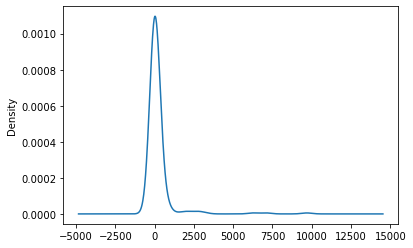

In [13]:
# Visualize the value counts of variety
variety_counts.plot.density()

In [14]:
replace_variety = list(variety_counts[variety_counts <= 300].index)

# Replace in dataframe
for variety in replace_variety:
    US_wine_data_df.variety = US_wine_data_df.variety.replace(variety,"Other")
    
# Check to make sure binning was successful
US_wine_data_df.variety.value_counts()

/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Pinot Noir                  9686
Cabernet Sauvignon          7104
Chardonnay                  6265
Other                       4221
Syrah                       3160
Red Blend                   2745
Zinfandel                   2702
Merlot                      2099
Sauvignon Blanc             2063
Bordeaux-style Red Blend    1639
Riesling                     926
Pinot Gris                   785
Petite Sirah                 733
Rosé                         722
Viognier                     684
Rhône-style Red Blend        683
Cabernet Franc               626
Sparkling Blend              593
Grenache                     519
White Blend                  518
Malbec                       511
Sangiovese                   409
Pinot Grigio                 330
Tempranillo                  320
Name: variety, dtype: int64

In [15]:
# Remove varieties where variety count <= 300
US_wine_data_df = US_wine_data_df[US_wine_data_df.variety != "Other"]
print(US_wine_data_df.shape)
US_wine_data_df.head()

(45822, 8)


,description,points,price,province,region,title,variety,winery
2,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris,Pinot Gris,Rainstorm
4,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,Alexander Valley,Louis M. Martini 2012 Cabernet Sauvignon,Cabernet Sauvignon,Louis M. Martini
14,Building on 150 years and six generations of w...,87,12.0,California,Central Coast,Mirassou 2012 Chardonnay,Chardonnay,Mirassou


In [16]:
# Save cleaned dataframe
# All US data after drop Na
US_wine_data_df.to_csv("Data/US_wine_data.csv", index=False)

In [17]:
# Import Dependencies for Database
from config import password
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import psycopg2

/Users/juhiaggarwal/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [18]:
db_string = f"postgresql+psycopg2://postgres:" + password + "@127.0.0.1:5432/WineEnthusiast"

In [19]:
engine = create_engine(db_string)

In [22]:
US_wine_data_df.to_sql(name='uswine', con=engine, method='multi')